# Построение теоритических графиков распределения наблюдений

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

## Подготовка данных для постоения графика

In [2]:
sigma = 0.2

p = np.linspace(0, 1, 500)
P_distr = norm(0.3, sigma).pdf(p)
N_distr = norm(0.7, sigma).pdf(p)


## Работа с графиком

### Метод который нанесет наиболее общие, для всех моих задумок, линии

In [3]:
def classes_distr_plot( p, P_distr, N_distr, xlabel_font_size = 20):
    ''' Распределения исследуемых классов и ничего лишнего '''
    plt.plot(p, P_distr, color = 'g')
    plt.plot(p, N_distr, color = 'r')
    plt.margins(x = 0 , y = 0)

    plt.xlabel('PD', fontsize = xlabel_font_size, loc = 'right')


def plot_filling(   p, P_distr, N_distr, discr_PD = 0.5, 
                    xlabel_font_size = 20, discr_PD_font_size = 15):
    '''График с распределениями классов и линией разделителем'''
    classes_distr_plot(p, P_distr, N_distr, xlabel_font_size)

    plt.text(discr_PD, -0.1, "PD'", fontsize = discr_PD_font_size)
    plt.plot(   [discr_PD,discr_PD], 
                [0, np.max(np.concatenate([P_distr, N_distr]))],
                '--', color = 'Black')
    

Наиболее общий график

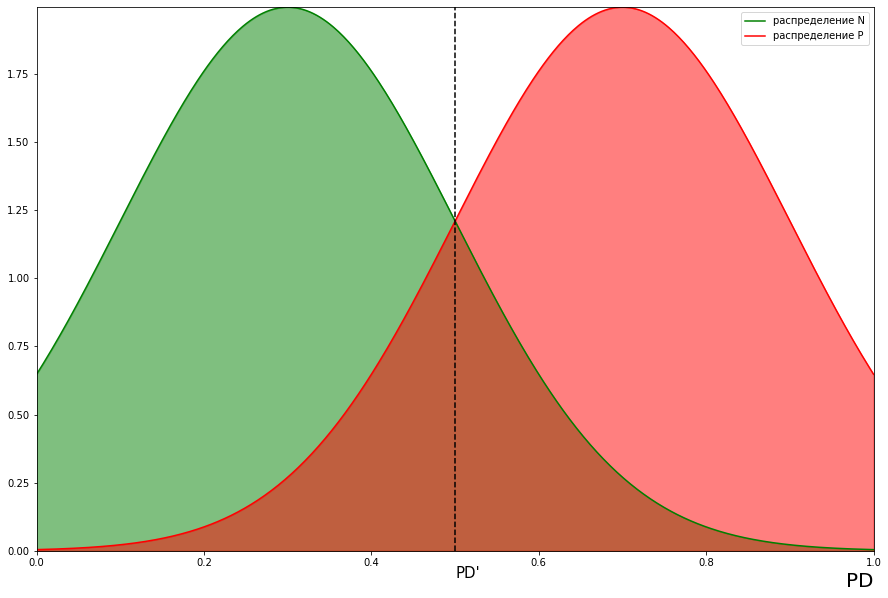

In [4]:
plt.figure(figsize=[15,10])

plot_filling(p, P_distr, N_distr)

plt.fill_between(p, P_distr, np.zeros(P_distr.size), color = 'g', alpha =0.5)
plt.fill_between(p, N_distr, np.zeros(N_distr.size), color = 'r', alpha = 0.5)

plt.legend(["распределение N","распределение P"])

plt.savefig("ROC_discribe_result/general_plot.png")

### Метод что нанесет TP, TN, FP, FN

In [5]:


def plot_sectors(p, P_distr, N_distr, discr_PD):
    fig = plt.figure(figsize = [15,10])

    def plot_sector(sector, sector_name):
        plt.subplot(sector)
        plt.title(sector_name)
        plot_filling(p, P_distr, N_distr, 
                    xlabel_font_size = 10, 
                    discr_PD_font_size = 8,
                    discr_PD = discr_PD)

    sentral_condition = (p <= discr_PD)
    inv_sc = np.invert(sentral_condition)
    color = (0.7, 0.7, 0.7)

    def auto_fill(cond, distr):
        plt.fill_between(   p[cond], distr[cond], 
                    np.zeros(cond.sum()),
                    color = color)

    plot_sector(221, "TP")
    fig.legend(["распределение N","распределение P"])
    auto_fill(inv_sc, N_distr)

    plot_sector(222, "FP")
    auto_fill(inv_sc, P_distr)

    plot_sector(223, "FN")
    auto_fill(sentral_condition, N_distr)

    plot_sector(224, "TN")
    auto_fill(sentral_condition, P_distr)

    

### Наносим строгую модель

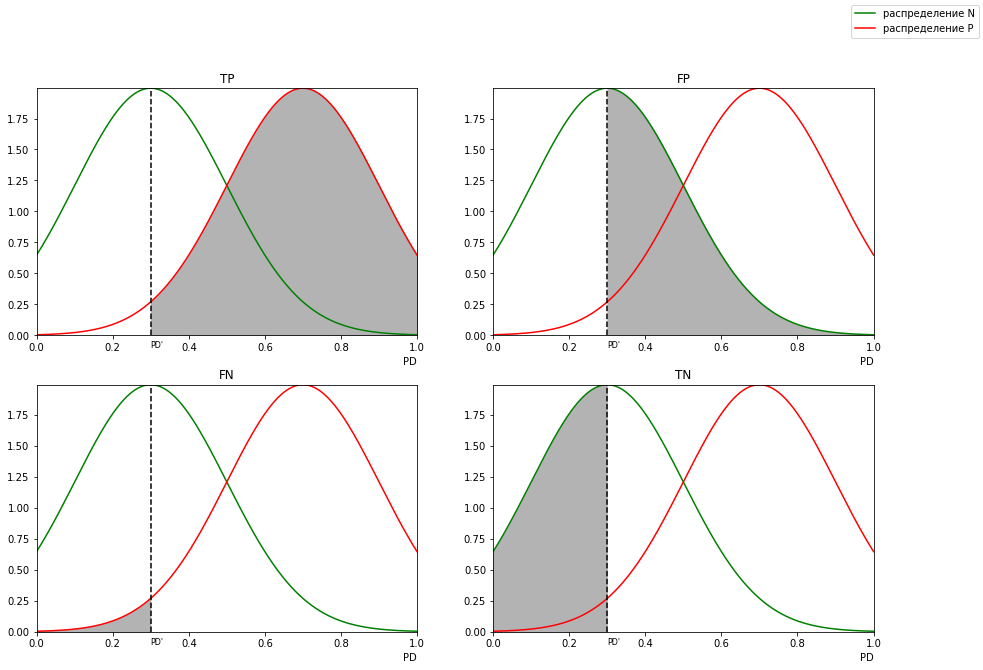

In [6]:
plot_sectors(p, P_distr, N_distr, 0.3)
plt.savefig("ROC_discribe_result/strict_plot.png")

### Наносим лояльную модель

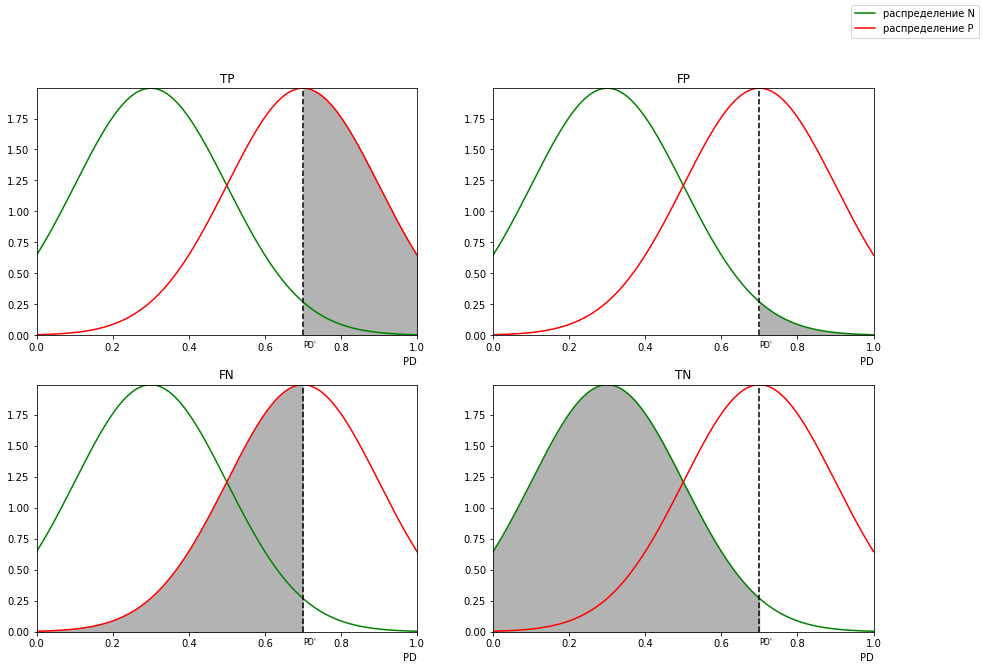

In [7]:
plot_sectors(p, P_distr, N_distr, 0.7)
plt.savefig("ROC_discribe_result/loyal_plot.png")

### Методы для построения ROC кривой опираясь на переданные теоритические распределения - в качестве теоритического распределения берется нормальное

In [8]:
import scipy as sp

def plot_theory_ROC(E1, E2, sigma, num = 50):
    '''Построит теоритическую ROC кривую - если распределения 
    теоритических классов, соответсвуют нормальным'''
    # inputs:
    # E1 - математическое ожидание перовго класса
    # E2 - математическое ожидание второго класса
    # sigma - стандартное отклонение обоих классов
    # num - число точек по которым будет строиться график

    points = np.linspace(0, 1, num)
    FPR = sp.stats.norm(E2, sigma).cdf(points)
    TPR = sp.stats.norm(E1, sigma).cdf(points)

    plt.plot(FPR, TPR)
    plt.xlabel('FPR')
    plt.ylabel('TPR')

### Ряд рисунков что показывают как связаны расстояния между пиками распределений классов и вид ROC кривой 

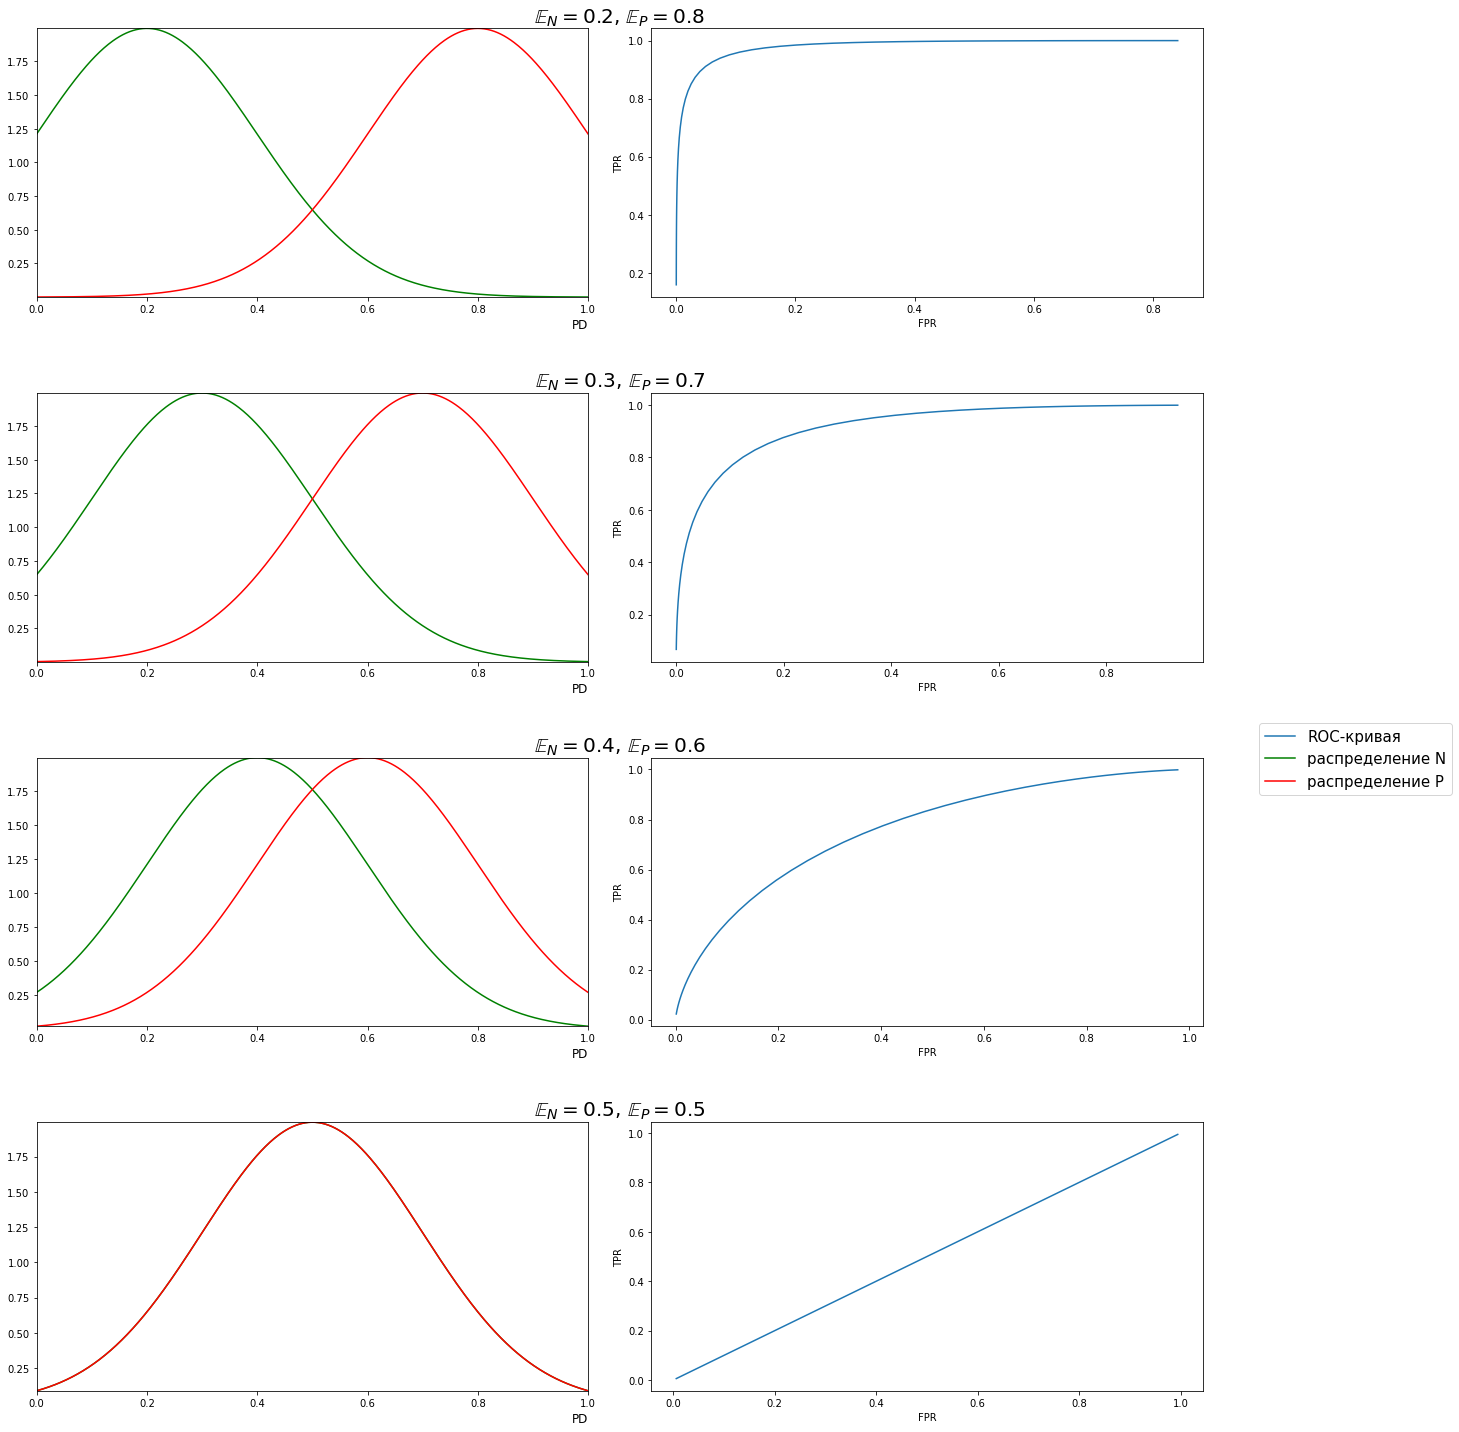

In [9]:
sigma = 0.2

fig = plt.figure(figsize = [15, 20])
gs = fig.add_gridspec(4, 2)
fig.tight_layout(h_pad = 10)


for i, E1 in enumerate(np.linspace(0.2, 0.5, 4)):
    E2 = 1 - E1
    
    fig.add_subplot(gs[i, 1])
    plot_theory_ROC(E1, E2, sigma)

    p = np.linspace(0, 1, 500)
    P_distr = norm(E1, sigma).pdf(p)
    N_distr = norm(E2, sigma).pdf(p)

    fig.add_subplot(gs[i, 0])
    classes_distr_plot(p, P_distr, N_distr, xlabel_font_size=12)

    title = fig.add_subplot(gs[i, :])
    title.set_title('$\mathbb{E}_N = $' + str(E1) + ', $\mathbb{E}_P = $' + str(E2), fontsize = 20)
    title.set_axis_off()

fig.tight_layout(h_pad = 4)
fig.legend(["ROC-кривая", "распределение N", "распределение P"], bbox_to_anchor=(1.2, 0.5), fontsize = 15)
fig.set_size_inches(17, 20)

fig.savefig("ROC_discribe_result/EtoROC plots.png", bbox_inches='tight')

## Что если распределения поменяются местами

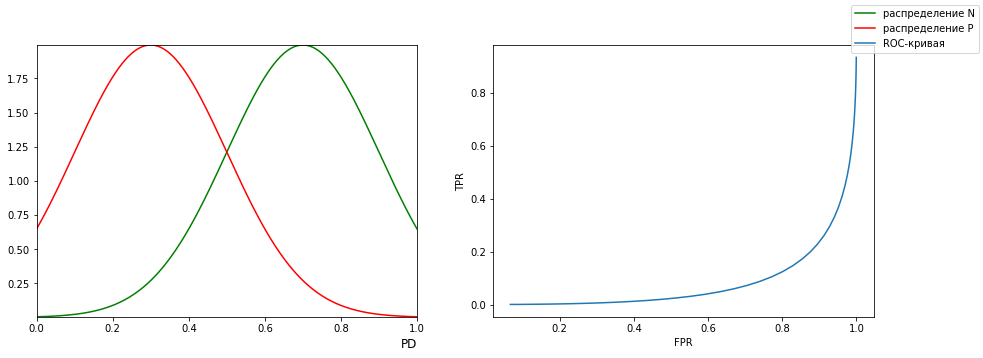

In [10]:
E1 = 0.7
E2 = 0.3
sigma = 0.2

fig = plt.figure(figsize = [15,5])

plt.subplot(121)
p = np.linspace(0, 1, 500)
P_distr = norm(E1, sigma).pdf(p)
N_distr = norm(E2, sigma).pdf(p)

plt.subplot(121)
classes_distr_plot(p, P_distr, N_distr, xlabel_font_size=12)


plt.subplot(122)
plot_theory_ROC(E1, E2, sigma)

fig.legend(["распределение N", "распределение P", "ROC-кривая"])
plt.savefig("ROC_discribe_result/inverse_ROC.png")

# Как работает KS статистика

Подготовим функцию, которая нанест KS статистику на график

In [35]:
import matplotlib.patches as patches

def plot_KS(
    p, Nc_distr, Pc_distr, ax,
    N_plot_param = {},
    P_plot_param = {},
    x_lab_param = {}, 
    label_param = {}
):
    '''Нанесение KS на график'''
    ax.plot(p, Nc_distr, **N_plot_param)
    ax.plot(p, Pc_distr, **P_plot_param)
    
    plt.xlabel("$PD$", **x_lab_param)
    
    pKS = np.argmax(np.abs(Nc_distr - Pc_distr))
    
    KS_arrow = patches.FancyArrowPatch(
        (p[pKS], Nc_distr[pKS]), (p[pKS], Pc_distr[pKS]), 
        arrowstyle='<->', mutation_scale=20
    )
    
    ax.text(
        p[pKS], (Nc_distr[pKS] + Pc_distr[pKS]) / 2, "KS",
        **label_param
    )
    
    ax.add_patch(KS_arrow)

Нанесем KS вместе с соответсвующими плотноснями распределения

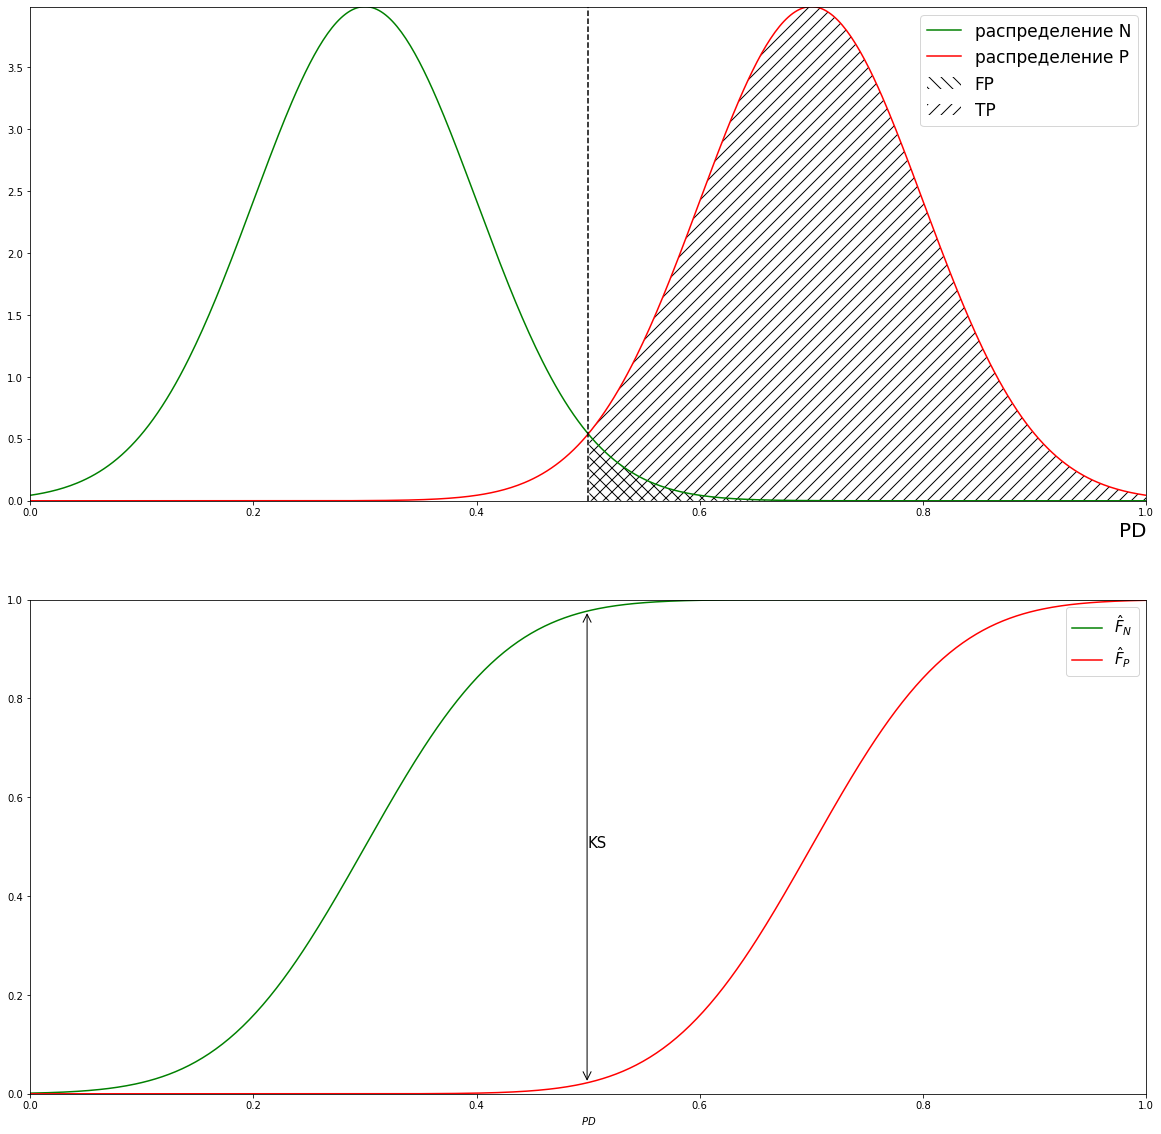

In [58]:
plt.figure(figsize = [20, 20])
p = np.linspace(0, 1 , 500)

N_values = norm(0.3, 0.1).pdf(p)
P_values = norm(0.7, 0.1).pdf(p)

# графики плотности распределений разлчных классов
plt.subplot(211)
classes_distr_plot(
    p, N_values, P_values
)

plt.fill_between(
    p[p>0.5], 
    N_values[p>0.5], np.zeros(sum(p>0.5)),
    hatch = '\\\\', alpha = 0
)

plt.fill_between(
    p[p>0.5],
    P_values[p>0.5], np.zeros(sum(p>0.5)),
    hatch = '//', alpha = 0
)

plt.plot(
    [0.5, 0.5], 
    [0, P_values.max()],
    color = 'black',
    linestyle = '--'
)

plt.legend([
    "распределение N",
    "распределение P",
    "FP", "TP"
    
], fontsize = 17)

# грфик KS распределения
axis = plt.subplot(212)

plot_KS(
    p, 
    norm(0.3, 0.1).cdf(p), 
    norm(0.7, 0.1).cdf(p),
    axis,
    N_plot_param = {'color':'green'},
    P_plot_param = {'color':'red'},
    label_param = {'fontsize':15}
)

plt.margins(x = 0 , y = 0)

plt.legend(["$\hat{F}_N$", "$\hat{F}_P$"], fontsize = 15)
plt.savefig("ROC_discribe_result/KS_describe.png")